<a href="https://colab.research.google.com/github/mathpoirot/Python-for-Business-Analytics-Class/blob/main/POIROT_Mathilde_Python_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT


# **Step 1: Select a Dataset**
I used Kaggle to find my dataset. I chose an employee performance dataset as I find it interesting to analyze the way people's performances are rated.

In [117]:
!pip install pandas
import pandas as pd

employeep = pd.read_csv('https://raw.githubusercontent.com/mathpoirot/test/refs/heads/main/modified_employee_data.csv')
print(employeep.head())

   ID                Name  Age  Gender Department      Salary Joining Date  \
0   1        Cory Escobar   48  Female         IT  2171.47344   2015-05-03   
1   2     Timothy Sanchez   25   Other      Sales  6842.00000   2020-11-09   
2   3        Chad Nichols   57   Other      Sales  2720.00000   2019-02-12   
3   4  Christine Williams   58  Female         IT  8112.00000   2017-09-08   
4   5        Amber Harris   35   Other         IT  3908.80000   2020-02-15   

   Performance Score  Experience    Status     Location  Session  \
0                3.0           1    Active     New York    Night   
1                4.0           8  Inactive  Los Angeles  Evening   
2                2.0           8  Inactive     New York  Morning   
3                4.0          15  Inactive  Los Angeles  Evening   
4                2.0           1  Inactive     New York  Evening   

  Experience Level  
0           Junior  
1           Medior  
2           Medior  
3           Senior  
4           Junio

We notice that the different columns of the CSV file are the following : *ID, Name, Age, Gender, Department, Salary, Joining Date, Performance Score, Experience, Status, Location, Session*


# **Step 2: Tasks and Requirements**


# **1. Basic Python Programming**

First, let's introduce some variables and add them to lists.
We can then put those lists in dictionaries to facilitate the analysis process.

In [118]:
ID = employeep['ID'].tolist()
names = employeep['Name'].tolist()
performances = employeep['Performance Score'].tolist()
age = employeep['Age'].tolist()
gender = employeep['Gender'].tolist()
department = employeep['Department'].tolist()
salary = employeep['Salary'].tolist()
joining_date = employeep['Joining Date'].tolist()
experience = employeep['Experience'].tolist()
status = employeep['Status'].tolist()
location = employeep['Location'].tolist()


performance_dict = dict(zip(names, performances))
identification_dict = dict(zip(names, ID))

Using conditional statements, I will translate the grade to a statement using the performance dictionnary to link the employee to their performance.

In [119]:
import numpy as np
import seaborn as sns
for name, performance in performance_dict.items():
  if performance == 5.0 :
    print(f"{name} has a perfect performance with a score of {performance}.")
  elif performance >= 4.0 :
    print(f"{name} has an excellent performance with a score of {performance}.")
  elif performance >= 3.0 :
    print(f"{name} has a good performance with a score of {performance}.")
  elif performance >= 2.0 :
    print(f"{name} has a fair performance with a score of {performance}.")
  elif performance >= 1.0 :
    print(f"{name}'s performance needs improvement with a score of {performance}.")
  else :
    print(f"{name} has no recorded performance, if you mean to change that, change '{performance}' to their actual performance")



Cory Escobar has a good performance with a score of 3.0.
Timothy Sanchez has an excellent performance with a score of 4.0.
Chad Nichols has a fair performance with a score of 2.0.
Christine Williams has an excellent performance with a score of 4.0.
Amber Harris has a fair performance with a score of 2.0.
Ashley Howe's performance needs improvement with a score of 1.0.
David Olson's performance needs improvement with a score of 1.0.
Amanda Baker has no recorded performance, if you mean to change that, change 'nan' to their actual performance
Jeremy Wright's performance needs improvement with a score of 1.0.
Brian Faulkner has a perfect performance with a score of 5.0.
Nicole Bell has a fair performance with a score of 2.0.
Rodney Richardson has no recorded performance, if you mean to change that, change 'nan' to their actual performance
Joshua Robinson has a fair performance with a score of 2.0.
Benjamin Callahan has an excellent performance with a score of 4.0.
Matthew Collins MD has a

In [120]:
def analyze_performance(performance):
  if performance == 5.0 :
    return "perfect"
  elif performance >= 4.0 :
    return "excellent"
  elif performance >= 3.0 :
    return "good"
  elif performance >= 2.0 :
    return "fair"
  elif performance >= 1.0 :
    return "needs improvement"
  elif performance >= 0.0 :
    return "poor"
  else :
    return "no recorded performance"

def performance_report(dataset):
  for index, row in dataset.iterrows():
    name = row['Name']
    performance = row['Performance Score']
    status = row['Status'].lower()
    ID = row['ID']
    analysis = analyze_performance(performance)
    print(f"{name} has a {analysis} performance with a score of {performance}. Their ID is {ID} and they are currently {status}")

performance_report(employeep)

Cory Escobar has a good performance with a score of 3.0. Their ID is 1 and they are currently active
Timothy Sanchez has a excellent performance with a score of 4.0. Their ID is 2 and they are currently inactive
Chad Nichols has a fair performance with a score of 2.0. Their ID is 3 and they are currently inactive
Christine Williams has a excellent performance with a score of 4.0. Their ID is 4 and they are currently inactive
Amber Harris has a fair performance with a score of 2.0. Their ID is 5 and they are currently inactive
Ashley Howe has a needs improvement performance with a score of 1.0. Their ID is 6 and they are currently active
David Olson has a needs improvement performance with a score of 1.0. Their ID is 7 and they are currently active
Amanda Baker has a no recorded performance performance with a score of nan. Their ID is 8 and they are currently inactive
Jeremy Wright has a needs improvement performance with a score of 1.0. Their ID is 9 and they are currently inactive
Bri

I believe creating another reusable function to **give the mean performance score for each department** could be useful. We'll see **which department is performing better.**

In [121]:
performance_by_dept = employeep.groupby('Department')['Performance Score'].mean()
performance_by_dept

,Performance Score
Department,
Finance,2.536585
HR,2.605769
IT,3.416667
Marketing,2.540541
Sales,2.768374


# **2. Data Manipulation**

Let's start by **checking the first few lines, general information and some statistics about the dataset.**

In [122]:
print(employeep.head())
print(employeep.info())
print(employeep.describe())

   ID                Name  Age  Gender Department      Salary Joining Date  \
0   1        Cory Escobar   48  Female         IT  2171.47344   2015-05-03   
1   2     Timothy Sanchez   25   Other      Sales  6842.00000   2020-11-09   
2   3        Chad Nichols   57   Other      Sales  2720.00000   2019-02-12   
3   4  Christine Williams   58  Female         IT  8112.00000   2017-09-08   
4   5        Amber Harris   35   Other         IT  3908.80000   2020-02-15   

   Performance Score  Experience    Status     Location  Session  \
0                3.0           1    Active     New York    Night   
1                4.0           8  Inactive  Los Angeles  Evening   
2                2.0           8  Inactive     New York  Morning   
3                4.0          15  Inactive  Los Angeles  Evening   
4                2.0           1  Inactive     New York  Evening   

  Experience Level  
0           Junior  
1           Medior  
2           Medior  
3           Senior  
4           Junio

We can notice several different things that we will be able to use later on in our analysis :


*   With employeep.head() and the first lines of the dataset, we notice there is no specific group or order in the way the rows appear
*   With employeep.info(), we notice that **within the 1000 entries, only 895 of them are non-null** for Performance Score and **954 of them are non-null** for Experience Level, this implies that 105 and 46 of them *are* null. We also notice which column is of the integer type, which leads us to the following point.
* With employeep.describe(), we learn some really interesting points for the rest of the analysis :
  * **ID** : The **1000 employees have a different ID** going from 1 to 1000.
  * **Age** : Going from 18 to 65 with a mean of 40 and a standard deviation of 14.
  * **Salary** : With a mean of 6159 and a standard deviation of 3390, **salaries vary considerably**, which may indicate a wide range of job levels and **experience** among employees.
  * **Performance score** : The scores seem to be balanced and to make sense, going from 0.0 to 5.0 with a mean of 2.9 and a standard deviation of 1.5.
  * **Experience** : Average experience is of 10.3 years with a standard deviation of 5.7 years. The minimum and maximum being respectively 1 year and 20 years. **Combined with the age, we see that employees vary in age and level of experience, which might influence their performance and salaries.**




Let's start the data manipulation by **checking whether there are duplicates or not.**

In [123]:
duplicates = employeep.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool


There are **no duplicates.**

Let's follow by **managing the missing values.**

In [124]:
print(employeep.isna().sum())

ID                     0
Name                   0
Age                    0
Gender                 0
Department             0
Salary                 0
Joining Date           0
Performance Score    105
Experience             0
Status                 0
Location               0
Session                0
Experience Level      46
dtype: int64


The **missing values are mostly linked to the performance scores**. Let's start with those. One solution could be to drop the rows where there are missing values. However, a lot of data from the dataset would be dropped. Lets think of another solution.
Instead, we will **replace them with the mean of the performance score of the departments they belong to** using the ***performance_by_dept* reusable function we created earlier.**

Regarding the missing values for the experience level, it's harder to make up another value as the standard deviation is of 5.7. Thus, we will drop those.

In [125]:
for i, row in employeep.iterrows():
    if pd.isna(row['Performance Score']):
        dept = row['Department']
        employeep.at[i, 'Performance Score'] = performance_by_dept[dept]

employeep = employeep.dropna(subset=['Experience Level'])

print(employeep.isna().sum())
print(employeep.describe())

ID                   0
Name                 0
Age                  0
Gender               0
Department           0
Salary               0
Joining Date         0
Performance Score    0
Experience           0
Status               0
Location             0
Session              0
Experience Level     0
dtype: int64
                ID         Age        Salary  Performance Score  Experience
count   954.000000  954.000000    954.000000         954.000000  954.000000
mean    497.558700   40.766247   6187.209529           2.925507    9.877358
std     289.856579   14.147287   3382.538092           1.456490    5.457135
min       1.000000   18.000000  -1480.800000           0.000000    1.000000
25%     245.250000   28.000000   3814.800000           2.000000    5.000000
50%     498.500000   41.000000   6299.400000           3.000000   10.000000
75%     745.750000   52.000000   8428.200000           4.000000   15.000000
max    1000.000000   65.000000  17623.749176           5.000000   19.000000


There are some **negative values in the Salary column** (we notice that with the minimum being negative). Let's fix this by **multiplying by (-1)** only negative values for the salary.

In [141]:
employeep.reset_index(drop=True, inplace=True)

for i in range(len(employeep)):
    if employeep.loc[i, 'Salary'] < 0:
        employeep.loc[i, 'Salary'] = -employeep.loc[i, 'Salary']

salary_stats = employeep['Salary'].describe()
print("Résumé statistique de la colonne 'Salary' :")
print(salary_stats)


Résumé statistique de la colonne 'Salary' :
count      954.000000
mean      6237.877479
std       3288.061687
min         16.000000
25%       3814.800000
50%       6299.400000
75%       8428.200000
max      17623.749176
Name: Salary, dtype: float64


In [144]:
# Compter le nombre de salaires inférieurs à 1000
low_salaries_count = (employeep['Salary'] < 900).sum()
print("Nombre de salaires inférieurs à 1000 :", low_salaries_count)


Nombre de salaires inférieurs à 1000 : 60


Now, onto **filtering, sorting, and grouping data to extract meaningful subsets or patterns.**
There is not much to do with the ID, the name or the gender.
However, we can deal with the experience by **creating a new column 'Seniority'**, to label employees as either **'Junior', 'Medior' or 'Senior'.**

In [127]:
def seniority(experience):
    if experience < 5:
        return 'Junior'
    elif 5 <= experience < 10:
        return 'Medior'
    else:
        return 'Senior'

employeep['Seniority'] = employeep['Experience'].apply(seniority)
employeep[['Name', 'Age', 'Salary', 'Performance Score', 'Seniority']].head(10)

,Name,Age,Salary,Performance Score,Seniority
0,Cory Escobar,48,2171.473440,3.000000,Junior
1,Timothy Sanchez,25,6842.000000,4.000000,Medior
2,Chad Nichols,57,2720.000000,2.000000,Medior
3,Christine Williams,58,8112.000000,4.000000,Senior
4,Amber Harris,35,3908.800000,2.000000,Junior
5,Ashley Howe,29,3421.200000,1.000000,Senior
6,Amanda Baker,52,6547.200000,2.605769,Senior
7,Jeremy Wright,63,620.800000,1.000000,Junior
8,Brian Faulkner,30,11775.887182,5.000000,Senior
9,Nicole Bell,42,4082.400000,2.000000,Senior


The obvious column we want to be **focusing on** is the **Performance score** one. We can start by **finding the high performers**, in order for the company to reward them. We can also take a look at the **repartition of high performers between the departments and seniority.**
Similarly, we can **do the same for low performers so that managers can try to help them improve.**

In [128]:
employeep['Performance Category'] = employeep['Performance Score'].apply(analyze_performance)

high_performers = employeep[employeep['Performance Category'].isin(['perfect'])]
high_performers_by_department = high_performers.groupby('Department').size().sort_values(ascending=False)
high_performers_by_seniority = high_performers.groupby('Seniority').size().sort_values(ascending=False)

low_performers = employeep[employeep['Performance Category'].isin(['poor', 'needs improvement'])]
low_performers_by_department = low_performers.groupby('Department').size().sort_values(ascending=False)
low_performers_by_seniority = low_performers.groupby('Seniority').size().sort_values(ascending=False)

high_performers[['Name', 'Age', 'Salary', 'Performance Score', 'Seniority']]

,Name,Age,Salary,Performance Score,Seniority
8,Brian Faulkner,30,11775.887182,5.0,Senior
25,Austin Long,20,9022.400000,5.0,Junior
29,Brandi Smith,21,9753.000000,5.0,Medior
30,Jacqueline Becker,63,13153.200000,5.0,Senior
31,Mr. Brian Nelson,42,12505.200000,5.0,Senior
...,...,...,...,...,...
928,Brett Myers,37,8469.600000,5.0,Junior
929,Bryce Anderson,52,12453.600000,5.0,Senior
940,Melissa Bradley,39,11189.000000,5.0,Medior
950,Todd Johnson,29,12274.800000,5.0,Senior


In [129]:
high_performers_by_department

,0
Department,
IT,71
Sales,71
HR,13
Marketing,2
Finance,1


In [130]:
high_performers_by_seniority

,0
Seniority,
Senior,81
Medior,50
Junior,27


In [131]:
low_performers[['Name', 'Age', 'Salary', 'Performance Score', 'Seniority']]

,Name,Age,Salary,Performance Score,Seniority
5,Ashley Howe,29,3421.2,1.0,Senior
7,Jeremy Wright,63,620.8,1.0,Junior
28,Rachel Ramsey,22,1593.6,0.0,Senior
35,Lawrence Rose,18,565.0,1.0,Medior
37,Lisa Wagner,36,1199.0,0.0,Medior
...,...,...,...,...,...
910,Erin Kelley,49,702.0,0.0,Senior
913,Morgan Coleman,51,1160.8,0.0,Junior
937,David Moody,43,1171.2,0.0,Senior
944,Amy Johnston,53,1416.0,1.0,Senior


In [132]:
low_performers_by_department

,0
Department,
Sales,103
HR,26
IT,26
Finance,9
Marketing,7


In [133]:
low_performers_by_seniority

,0
Seniority,
Senior,82
Medior,49
Junior,40


# **3. Mathematical Operations**

*NOTE : This goes with the filtering, sorting and ordering but since I started working with sums and other mathematicals operations I still started this section here.*




Now, I believe it could be interesting to take a peek at the **salaries to see if they make sense in accordance to the performance score.**
We can start by **calculating the % contribution of each employee's salary to the company, to their department and to their seniority level.**

In [134]:
total_company_salary = employeep['Salary'].sum()
employeep['Department Total Salary'] = employeep.groupby('Department')['Salary'].transform('sum')
employeep['Seniority Total Salary'] = employeep.groupby('Seniority')['Salary'].transform('sum')

employeep['Salary % of Total'] = (employeep['Salary'] / total_company_salary) * 100
employeep['Salary % of Department'] = (employeep['Salary'] / employeep['Department Total Salary']) * 100
employeep['Salary % of Seniority'] = (employeep['Salary'] / employeep['Seniority Total Salary']) * 100

employeep[['Name', 'Department', 'Seniority', 'Salary', 'Salary % of Total', 'Salary % of Department', 'Salary % of Seniority']]

,Name,Department,Seniority,Salary,Salary % of Total,Salary % of Department,Salary % of Seniority
0,Cory Escobar,IT,Junior,2171.47344,0.036490,0.106461,0.242463
1,Timothy Sanchez,Sales,Medior,6842.00000,0.114974,0.237139,0.426015
2,Chad Nichols,Sales,Medior,2720.00000,0.045707,0.094273,0.169360
3,Christine Williams,IT,Senior,8112.00000,0.136315,0.397709,0.235178
4,Amber Harris,IT,Junior,3908.80000,0.065684,0.191638,0.436449
...,...,...,...,...,...,...,...
949,Pamela Reeves,Sales,Medior,6839.00000,0.114923,0.237035,0.425828
950,Todd Johnson,Sales,Senior,12274.80000,0.206267,0.425436,0.355864
951,Michael Sanchez,Sales,Junior,3810.40000,0.064030,0.132066,0.425462
952,Ashley Taylor,Sales,Senior,7346.40000,0.123450,0.254621,0.212982


Following the same train of thoughts. I can also check the **contribution to salary total for low and high performers.**

In [135]:
high_performers_salary_contribution = high_performers['Salary'].sum() / total_company_salary * 100
low_performers_salary_contribution = low_performers['Salary'].sum() / total_company_salary * 100

print(f"High performers contribute {high_performers_salary_contribution:.2f}% to the total salary.")
print(f"Low performers contribute {low_performers_salary_contribution:.2f}% to the total salary.")


High performers contribute 28.22% to the total salary.
Low performers contribute 4.29% to the total salary.


Now, I want to see the **correlation between salary and performance score.**

In [136]:
correlation = employeep['Salary'].corr(employeep['Performance Score'])
print(f'Correlation between Salary and Performance Score: {correlation}')

Correlation between Salary and Performance Score: 0.8982540053683598


The correlation is near 0. Thus, it is very low and it means that **Performance Score and Salary don't seem to be correlated**. Thus, employees earning a higher wage won't have a better performance than low wage employees.

# **4. Data Visualisation**

<ipython-input-137-a7352fe053eb>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  session_scores = employeep.groupby("Session")["Performance Score"].mean()


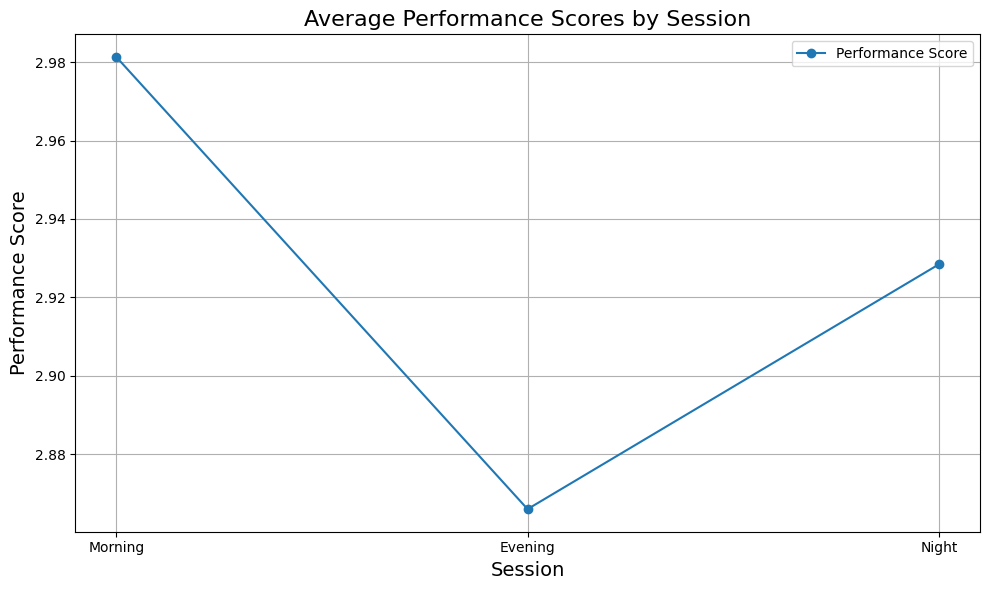

In [137]:
session_order = ['Morning', 'Evening', 'Night']
employeep['Session'] = pd.Categorical(employeep['Session'], categories=session_order, ordered=True)

# Calculer les scores de performance moyens par session
session_scores = employeep.groupby("Session")["Performance Score"].mean()

# Créer le graphique en ligne
plt.figure(figsize=(10, 6))
plt.plot(session_scores, marker='o', label="Performance Score")
plt.title("Average Performance Scores by Session", fontsize=16)
plt.xlabel("Session", fontsize=14)
plt.ylabel("Performance Score", fontsize=14)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

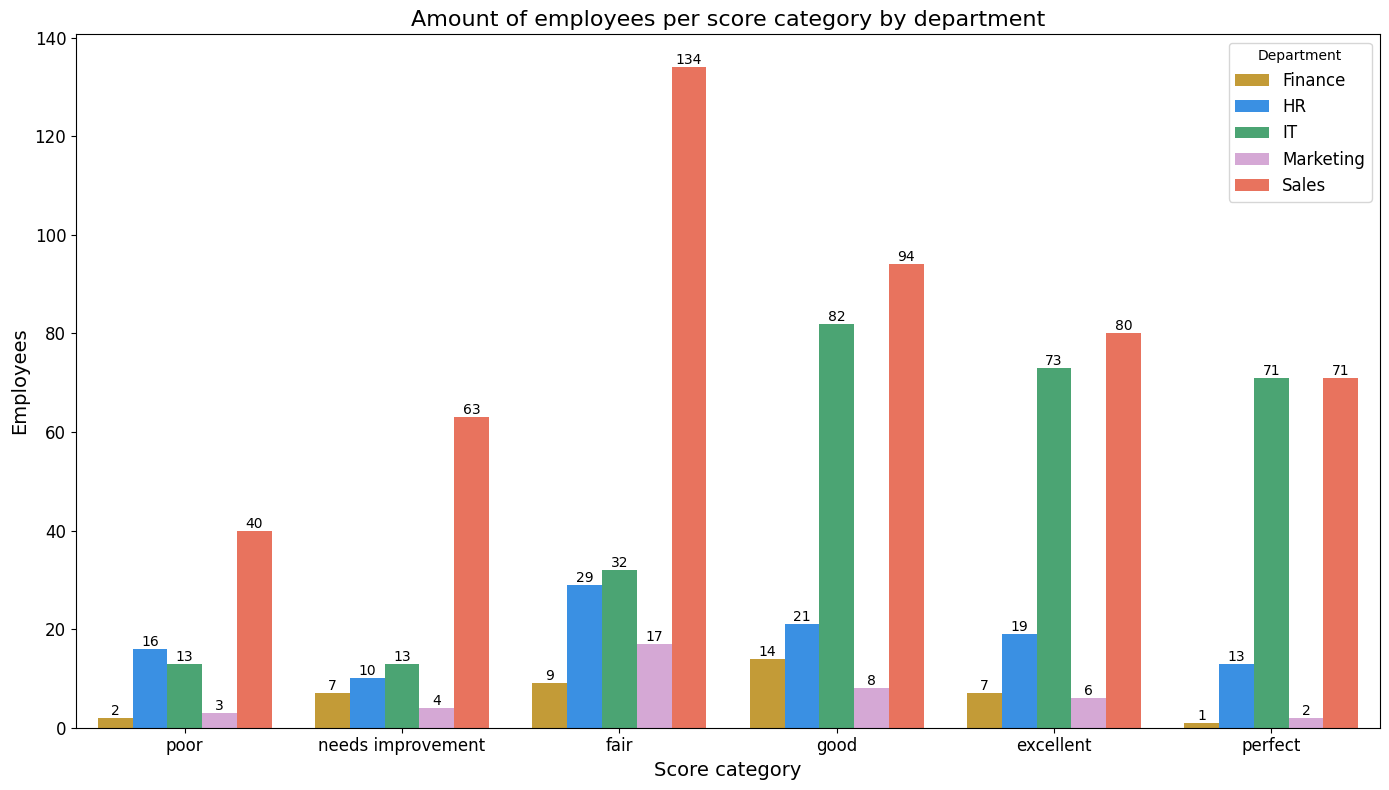

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

performance_counts = employeep.groupby(['Performance Category', 'Department']).size().reset_index(name='Count')
performance_order = ['poor', 'needs improvement', 'fair', 'good', 'excellent', 'perfect']
performance_counts['Performance Category'] = pd.Categorical(performance_counts['Performance Category'], categories=performance_order, ordered=True)
palette={"IT": "mediumseagreen", "Sales": "tomato", "HR": "dodgerblue", "Finance":"goldenrod", "Marketing":"plum"}

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=performance_counts,
    x='Performance Category',
    y='Count',
    hue='Department',
    palette=palette
)

# Ajouter des annotations pour afficher les valeurs
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", fontsize=10, color="black")

# Personnaliser le graphique
plt.title("Amount of employees per score category by department", fontsize=16)
plt.xlabel("Score category", fontsize=14)
plt.ylabel("Employees", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Department", fontsize=12)
plt.tight_layout()
plt.show()

<ipython-input-139-3bdb6bfb21d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Performance Score', data=employeep, palette='Set2')


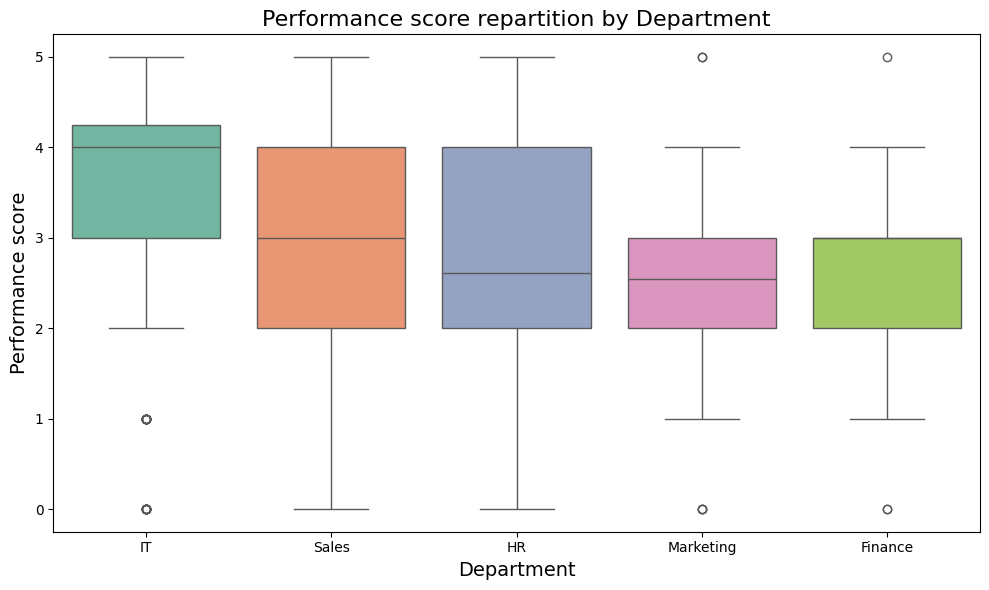

In [139]:
# Créer un boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Performance Score', data=employeep, palette='Set2')

# Personnaliser le graphique
plt.title("Performance score repartition by Department", fontsize=16)
plt.xlabel("Department", fontsize=14)
plt.ylabel("Performance score", fontsize=14)
plt.tight_layout()
plt.show()


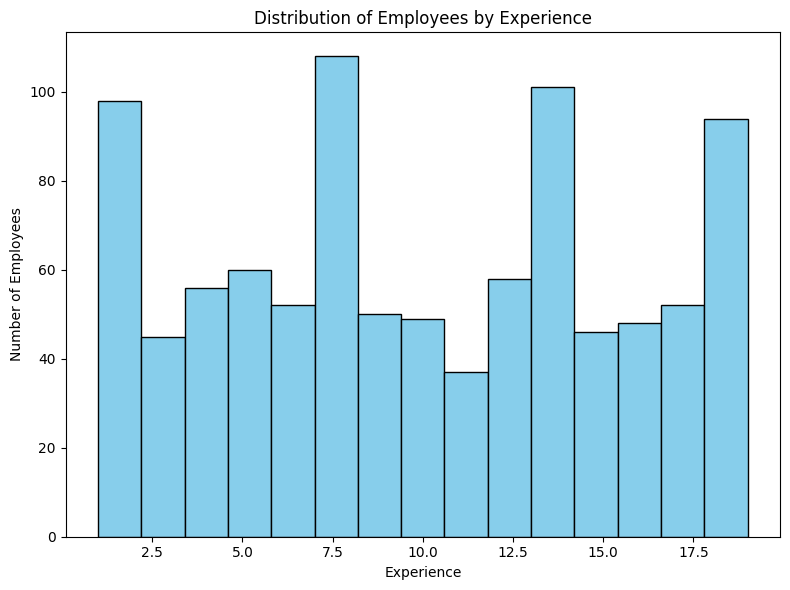

In [140]:
plt.figure(figsize=(8,6))
plt.hist(employeep['Experience'], bins=15, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Employees by Experience')
plt.xlabel('Experience')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()